In [1]:
from ClustersFeatures import *
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
pd_df=pd.DataFrame(digits.data)
pd_df['target'] = digits.target
pd_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [2]:
CC=ClustersCharacteristics(pd_df, "target")



In [3]:
r=CC.utils_Projection_2D_Density("PCA",clusters=CC.labels_clusters, return_data=True,return_clusters_density=True)

In [11]:
import plotly.graph_objects as go
from plotly.graph_objs import Layout
import plotly.express as px
clusters=CC.labels_clusters
Z=np.zeros(r[0].shape)

yaxis_name_converter = lambda x: str(x + 1) if (x != 0) else ""
contours_=[]
for i,Cluster in enumerate(clusters):
    Z+=r[1][Cluster]
    z=np.round(1*(r[1][Cluster]>np.percentile(r[1][Cluster],90))*r[1][Cluster],1)
    contours_.append(go.Contour(
            x=r[0].index.values,
            y=r[0].columns.values,
            z=z,
            name=str(Cluster),
            opacity=0.70,
            contours=dict(
                type="constraint",
                start=5)
            ))
fig = go.Figure(data=contours_)   

fig.show()

In [5]:
pd.DataFrame(r[1][0])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.331661e-231,6.745669e-233,1.314388e-234,1.724890e-236,1.524537e-238,9.075147e-241,3.638382e-243,9.824309e-246,1.786630e-248,2.188297e-251
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.101706e-223,6.080393e-225,1.184760e-226,1.554776e-228,1.374183e-230,8.180132e-233,3.279555e-235,8.855409e-238,1.610428e-240,1.972482e-243
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.359743e-215,3.933838e-217,7.665054e-219,1.005895e-220,8.890568e-223,5.292309e-225,2.121778e-227,5.729194e-230,1.041900e-232,1.276139e-235
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.314225e-208,1.826752e-209,3.559413e-211,4.671066e-213,4.128504e-215,2.457584e-217,9.852876e-220,2.660460e-222,4.838262e-225,5.925992e-228
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.104561e-200,6.088652e-202,1.186369e-203,1.556888e-205,1.376050e-207,8.191243e-210,3.284010e-212,8.867438e-215,1.612615e-217,1.975161e-220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.408994e-89,2.706209e-84,2.047509e-79,1.043349e-74,3.580734e-70,8.276637e-66,1.288473e-61,1.350947e-57,9.540012e-54,4.537647e-50,...,7.986402e-47,4.136244e-49,1.442787e-51,3.389518e-54,5.363059e-57,5.715132e-60,4.101842e-63,1.982762e-66,6.455076e-70,1.415373e-73
96,3.401949e-91,3.821672e-86,2.891465e-81,1.473404e-76,5.056674e-72,1.168824e-67,1.819611e-63,1.907966e-59,1.347686e-55,6.415972e-52,...,6.797861e-50,3.520661e-52,1.228061e-54,2.885064e-57,4.564887e-60,4.864562e-63,3.491374e-66,1.687672e-69,5.494382e-73,1.204727e-76
97,3.448245e-93,3.873681e-88,2.930818e-83,1.493462e-78,5.125585e-74,1.184811e-69,1.844837e-65,1.935708e-61,1.370611e-57,6.582953e-54,...,4.153284e-53,2.150906e-55,7.502671e-58,1.762590e-60,2.788854e-63,2.971936e-66,2.133007e-69,1.031060e-72,3.356716e-76,7.360109e-80
98,2.508691e-95,2.818215e-90,2.132276e-85,1.086588e-80,3.729690e-76,8.625664e-72,1.345496e-67,1.421032e-63,1.030057e-59,5.360957e-56,...,1.823089e-56,9.432063e-59,3.289959e-61,7.729036e-64,1.222925e-66,1.303207e-69,9.353330e-73,4.521244e-76,1.471935e-79,3.227441e-83


In [6]:
pd.DataFrame(r[1][Cluster])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,5.329739e-136,1.111455e-129,1.561052e-123,1.476664e-117,9.407739e-112,4.036715e-106,1.166568e-100,2.270553e-95,2.976411e-90,2.627809e-85,...,2.951446e-123,5.287260e-128,6.379191e-133,5.183696e-138,2.836955e-143,1.045694e-148,2.595944e-154,4.340355e-160,4.887584e-166,3.706825e-172
1,5.396875e-134,1.125456e-127,1.580716e-121,1.495265e-115,9.526250e-110,4.087567e-104,1.181265e-98,2.299159e-93,3.013912e-88,2.660921e-83,...,3.172115e-119,5.682570e-124,6.856141e-129,5.571263e-134,3.049064e-139,1.123876e-144,2.790034e-150,4.664868e-156,5.253011e-162,3.983972e-168
2,3.922447e-132,8.179812e-126,1.148864e-119,1.086759e-113,6.923681e-108,2.970846e-102,8.585443e-97,1.671032e-91,2.190518e-86,1.933966e-81,...,2.447041e-115,4.383664e-120,5.288983e-125,4.297799e-130,2.352117e-135,8.669837e-141,2.152295e-146,3.598585e-152,4.052292e-158,3.073326e-164
3,2.046209e-130,4.267135e-124,5.993242e-118,5.669262e-112,3.611856e-106,1.549793e-100,4.478748e-95,8.717242e-90,1.142724e-84,1.008891e-79,...,1.354915e-111,2.427213e-116,2.928484e-121,2.379670e-126,1.302356e-131,4.800446e-137,1.191715e-142,1.992519e-148,2.243734e-154,1.701686e-160
4,7.661634e-129,1.597746e-122,2.244054e-116,2.122746e-110,1.352391e-104,5.802910e-99,1.676984e-93,3.264013e-88,4.278730e-83,3.777619e-78,...,5.384692e-108,9.646213e-113,1.163836e-117,9.457268e-123,5.175814e-128,1.907790e-133,4.736107e-139,7.918655e-145,8.917032e-151,6.762827e-157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.036548e-51,6.995038e-50,4.339236e-48,2.486978e-46,1.155385e-44,3.895437e-43,9.085576e-42,1.471585e-40,2.116232e-39,7.195996e-38,...,1.078573e-177,6.687874e-182,2.792965e-186,7.855648e-191,1.488118e-195,1.898593e-200,1.631418e-205,9.441431e-211,3.680012e-216,9.660502e-222
96,3.539265e-55,2.727925e-53,1.982092e-51,1.260189e-49,6.118043e-48,2.094695e-46,4.926199e-45,8.378521e-44,1.789393e-42,1.059321e-40,...,8.318785e-184,5.158202e-188,2.154149e-192,6.058878e-197,1.147751e-201,1.464341e-206,1.258275e-211,7.281956e-217,2.838308e-222,7.450921e-228
97,9.161222e-59,8.241475e-57,6.880977e-55,4.703388e-53,2.346638e-51,8.112654e-50,1.933223e-48,3.745443e-47,1.453361e-45,1.200144e-43,...,4.605199e-190,2.855531e-194,1.192516e-198,3.354137e-203,6.353839e-208,8.106449e-213,6.965689e-218,4.031221e-223,1.571260e-228,4.124758e-234
98,1.822023e-62,1.920319e-60,1.787000e-58,1.280595e-56,6.496137e-55,2.262625e-53,5.568948e-52,1.459275e-50,1.045958e-48,1.001053e-46,...,1.829849e-196,1.134628e-200,4.738393e-205,1.332746e-209,2.524661e-214,3.221050e-219,2.767776e-224,1.601782e-229,6.243309e-235,1.638948e-240


In [7]:

data=r[2]


import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        x=r[0].index.values,
        y=r[0].columns.values,
        z=r[0],
        contours_coloring='heatmap',
        colorscale = 'Blues'
    ))

centroids={}
for Cluster in CC.labels_clusters:
    centroids[Cluster]=data[CC.data_target==Cluster].mean()


"""
fig.add_trace(go.Scatter(x=pd.DataFrame(centroids).loc[data.columns[0]], y=pd.DataFrame(centroids).loc[data.columns[1]],
                    mode='markers',
                    name='markers'))
"""

fig.add_trace(go.Scatter(x=data[data.columns[0]], y=data[data.columns[1]],mode="markers", marker_color=CC.data_target,opacity=0.90))
fig.show()

In [8]:
df=pd.concat([data,CC.data_target],axis=1)
test=ClustersCharacteristics(df,"target")

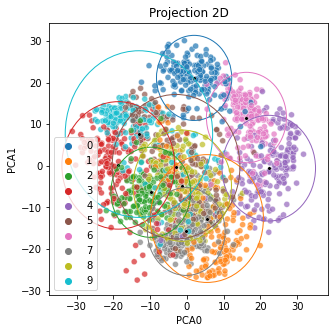

In [9]:
test.projection_2D("PCA0","PCA1")

In [10]:
qsd

NameError: name 'qsd' is not defined

In [ ]:
CC.graph_density_projection_2D("surface", "PCA", "robust")

In [ ]:
qdqsd

In [ ]:
gggg

In [ ]:
CC.graph_()

In [ ]:
yyy

In [ ]:
from sklearn.neighbors import KernelDensity

data_PCA=CC2.utils_PCA(2)
xmin = data_PCA['PCA0'].min() 
xmax = data_PCA['PCA0'].max()
ymin = data_PCA['PCA1'].min()
ymax = data_PCA['PCA1'].max()

# x coordinates of the grid cells
xgrid = np.arange(xmin, xmax, (xmax-xmin)/100)
# y coordinates of the grid cells
ygrid = np.arange(ymin, ymax, (ymax-ymin)/100)
X,Y=np.meshgrid(xgrid, ygrid[::-1])

xy = np.vstack([Y.ravel(), X.ravel()]).T

In [ ]:

kde = KernelDensity(bandwidth=0.04, kernel='gaussian')
kde.fit(data_PCA)

In [ ]:
result=pd.DataFrame(kde.score_samples(xy).reshape(X.shape))

In [ ]:
result=pd.DataFrame(kde.score_samples(xy).reshape(X.shape))
result=(result-result.mean().mean())/result.std().std()
result

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=result.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Contour(
        x=xgrid,
        y=ygrid,
        z=result,
        colorscale='RdBu')])
fig.show()

In [ ]:
CC2.graph_PCA_2D()

In [ ]:
result


In [ ]:
print(x)

In [ ]:
--

In [ ]:
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
X, y = make_blobs(n_samples=200, centers=2, n_features=3,cluster_std=0.5)
X=StandardScaler().fit_transform(X)
T=pd.DataFrame(data=X)
T['target']=y
CC2=ClustersCharacteristics(T,"target")

In [ ]:
r=CC2.utils_PCA(2)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(go.Histogram2dContour(
        x = r[r.columns[0]],
        y = r[r.columns[1]],
        colorscale = 'Blues'
))


fig.add_trace(go.Scatter(
        x = r[r.columns[0]],
        y = r[r.columns[1]],
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = '#549ecd',
            size = 3
        )
    ))
fig.add_trace(go.Histogram(
        y = r[r.columns[1]],
        xaxis = 'x2',
        marker = dict(
            color = '#549ecd'
        )
    ))
fig.add_trace(go.Histogram(
        x = r[r.columns[0]],
        yaxis = 'y2',
        marker = dict(
        color = '#549ecd'
        )
    ))
fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    height = 600,
    width = 900,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)
fig.show()

In [ ]:
reduction_method="PCA"
if reduction_method == "UMAP":
    data=CC.utils_UMAP()
elif reduction_method == "PCA":
    data=CC.utils_PCA(2)

xmin, xmax = data[data.columns[0]].min(), data[data.columns[0]].max()
ymin, ymax = data[data.columns[1]].min(), data[data.columns[1]].max()

X,Y = np.meshgrid(np.arange(xmin,xmax, (xmax-xmin)/100 ),np.arange(ymin,ymax,(ymax-ymin)/100))
std=1
gaussian_distrib = np.vectorize(lambda grid_coord,point_coord : np.exp(-1*np.sum((np.array(grid_coord)-np.array(point_coord))**2/(2*std)))/(2*np.pi*std**2))

In [ ]:
qsdf

In [ ]:
qsdf

In [ ]:
sdfq

In [ ]:
grid_coord_all=np.transpose([np.arange(xmin,xmax, (xmax-xmin)/100 ),np.arange(ymin,ymax,(ymax-ymin)/100)])


In [ ]:
np.sum((np.array([[1,0],[2,0]])-np.array([[0,0],[0,0]]))**2)

In [ ]:
gaussian_distrib(grid_coord_all,[0,0])

In [ ]:
CC2.graph_density_projection_2D("surface", "PCA",None)

In [ ]:
CC2.data_interelement_distance_for_clusters(clusters=[1])

In [ ]:
CC2.data_interelement_distance_for_clusters(clusters=[1,2])

In [ ]:
CC2.clusters_info

In [ ]:
CC2.general_info()

In [ ]:
CC2.confusion_hypersphere_matrix(radius=0.15, counting_type='including')

In [ ]:
CC2.data_intercentroid_distance_matrix()

In [ ]:
CC2.data_centroids

### Speed test of different scores

In [ ]:
print('score_index_ball_hall \n')
%timeit CC.score_index_ball_hall()
print('\nscore_index_banfeld_Raftery\n')
%timeit CC.score_index_banfeld_Raftery()
print('\nscore_index_c\n')
%timeit CC.score_index_c()
print('\nscore_index_c_for_each_cluster\n')
%timeit CC.score_index_c_for_each_cluster(0)
print('\nscore_index_calinski_harabasz \n')
%timeit CC.score_index_calinski_harabasz()
print('\nscore_index_davies_bouldin \n')
%timeit CC.score_index_davies_bouldin()
print('\nscore_index_davies_bouldin_for_each_cluster \n')
%timeit CC.score_index_davies_bouldin_for_each_cluster()
print('\nscore_index_det_ratio \n')
%timeit CC.score_index_det_ratio()
print('\nscore_index_dunn\n')
%timeit CC.score_index_dunn()
print('\nscore_index_generalized_dunn_matrix\n')
%timeit CC.score_index_generalized_dunn_matrix()
print('\nscore_index_Log_Det_ratio\n')
%timeit CC.score_index_Log_Det_ratio()
print('\nscore_index_log_ss_ratio \n')
%timeit CC.score_index_log_ss_ratio()
print('\nscore_index_mclain_rao \n')
%timeit CC.score_index_mclain_rao()
print('\nscore_index_PBM \n')
%timeit CC.score_index_PBM()
print('\nscore_index_point_biserial\n')
%timeit CC.score_index_point_biserial()
print('\nscore_index_ratkowsky_lance \n')
%timeit CC.score_index_ratkowsky_lance()
print('\nscore_index_ray_turi \n')
%timeit CC.score_index_ray_turi()
print('\nscore_index_S_Dbw \n')
%timeit CC.score_index_S_Dbw()
print('\nscore_index_scott_symons\n')
%timeit CC.score_index_scott_symons()
print('\nscore_index_SD \n')
%timeit CC.score_index_SD()
print('\nscore_index_trace_WiB \n')
%timeit CC.score_index_trace_WiB()
print('\nscore_index_wemmert_gancarski \n')
%timeit CC.score_index_wemmert_gancarski()
print('\nscore_index_xie_beni\n')
%timeit CC.score_index_xie_beni()

In [ ]:
bc_list = np.arange(1, 7)
wc_list = np.arange(1, 4)

df = pd.DataFrame(columns=wc_list, index=bc_list)
for bc in bc_list:
    for wc in wc_list:
        print(wc,bc)
        %timeit CC.score_index_generalized_dunn(within_cluster_distance=wc, between_cluster_distance=bc)
        df.loc[bc, wc] = CC.score_index_generalized_dunn(within_cluster_distance=wc, between_cluster_distance=bc)
        
df.index.name = "Generalized Dunn Indexes"
df